# TD de classification - Partie 2 - Validation croisée

**Objectif de ce Notebook :**

L'objectif de ce notebook est de vous familiariser avec la **validation croisée** pour améliorer la robustesse et la fiabilité de votre modèle/

**Mots-clés :**

- **Justesse (accuracy)**
- **Précision**
- **Rappel**
- **Validation croisée** 

**Ressources :**

- [Machine à vecteurs de support (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Matrice de confusion](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
- [Métriques de classification](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
- [Validation croisée](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

___

▶️ Importer les **bibliothèques** nécessaires à l'activité

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import matplotlib.colors as mcolors

▶️ **Exécuter le code** de la fonction d'affichage des graphiques

In [2]:
def afficher_graphique(
    X, y,
    const=None, coef0=None, coef1=None,
    svm=None, support=None,
):
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))
    # Données
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Classe 0')
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Classe 1')
    # Droite de décision
    if const and coef0 and coef1 is not None:
        x_values = np.array([X[:, 0].min(), X[:, 0].max(A)])
        y_values = -(const + coef0 * x_values) / coef1
        ax.plot(x_values, y_values, 'g-', label='Droite de décision')
    # Vecteurs de support
    if svm and support is not None:
        xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['gray', 'gray', 'gray'])
        ax.scatter(support[:, 0], support[:, 1], s=100,
           facecolors='none', edgecolors='green', label='Vecteurs de support')        
    ax.set_xlabel("Caractéristique 1")
    ax.set_ylabel("Caractéristique 2")
    ax.legend()
    fig.suptitle("Entrainement d'un modèle de classification (SVM)", fontsize=20, y=1)
    plt.show()

▶️ **Importer et afficher les données** à classifier

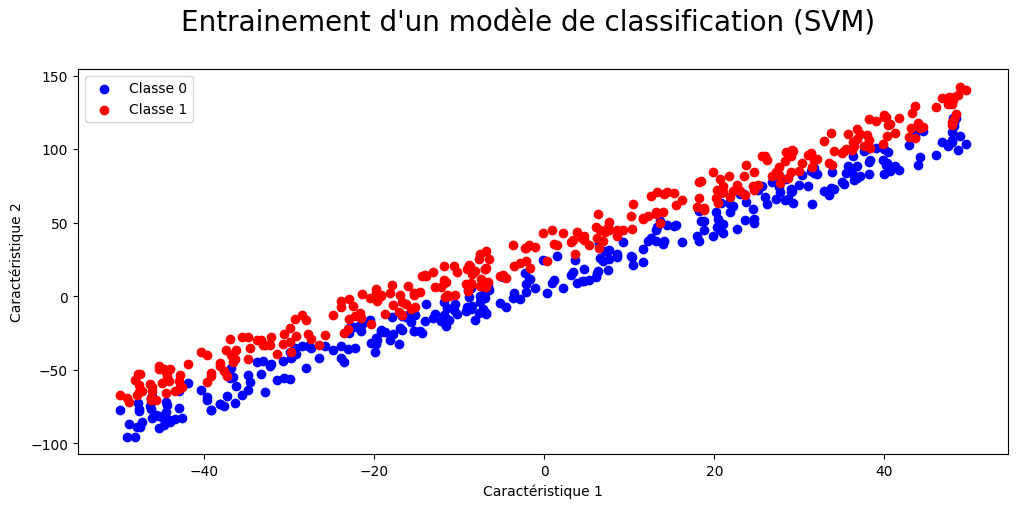

In [3]:
# Création du jeu de données
data_1 = pd.read_csv('data_class_2_1.csv')
X_1 = data_1.iloc[:, :2].to_numpy()
y_1 = data_1.iloc[:, 2].to_numpy()
afficher_graphique(X_1, y_1)

## 💻 Code à compléter

**Objectif :**

Effectuer une **validation croisée** sur les données X,y.

**Etapes :**

- Effectuer une **validation croisée à 10 plis**
- Calculer la **moyenne** et l'**écart-type de la justesse (accuracy)**
- Même question avec le **deuxième jeu de données** nommé `data_class_2_2.csv`
- Quel est le **meilleur modèle** ?
- Analyser l'ensemble des **métriques de classification** et la **matrice de confusion** sur les deux jeu de données

**Ressources à utiliser :**

- [Machine à vecteurs de support (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
- [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

In [4]:
# Initialiser le modèle
model = SVC(kernel='linear')

# Configurer K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=2)

# Exécuter la validation croisée et obtenir les scores et les modèles
results = cross_validate(model, X_1, y_1, cv=kf)

# Extraire les scores pour chaque pli
scores = results['test_score']
print("Justesse pour chaque pli :", scores)
print("Justesse moyenne : ", scores.mean())
print("Justesse écart-type : ", scores.std())

Justesse pour chaque pli : [0.83333333 0.93333333 0.86666667 0.81666667 0.86666667 0.91666667
 0.88333333 0.95       0.85       0.95      ]
Justesse moyenne :  0.8866666666666665
Justesse écart-type :  0.045825756949558386


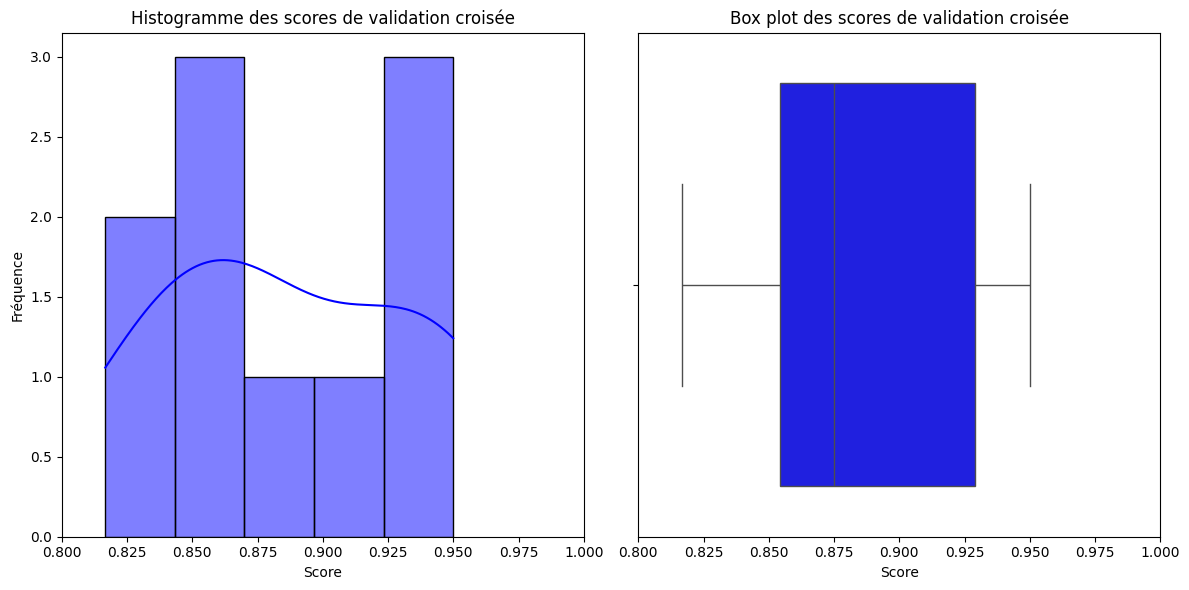

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(scores, bins=5, kde=True, color='blue')
plt.title('Histogramme des scores de validation croisée')
plt.xlim((0.8, 1))
plt.xlabel('Score')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
sns.boxplot(x=scores, color='blue')
plt.xlim((0.8, 1))
plt.title('Box plot des scores de validation croisée')
plt.xlabel('Score')

plt.tight_layout()
plt.show()

Justesse pour chaque pli : [0.96969697 1.         0.96969697 0.96969697 1.         0.96969697
 1.         0.96969697 0.96969697 1.        ]
Justesse moyenne :  0.9818181818181818
Justesse écart-type :  0.014845392380504098


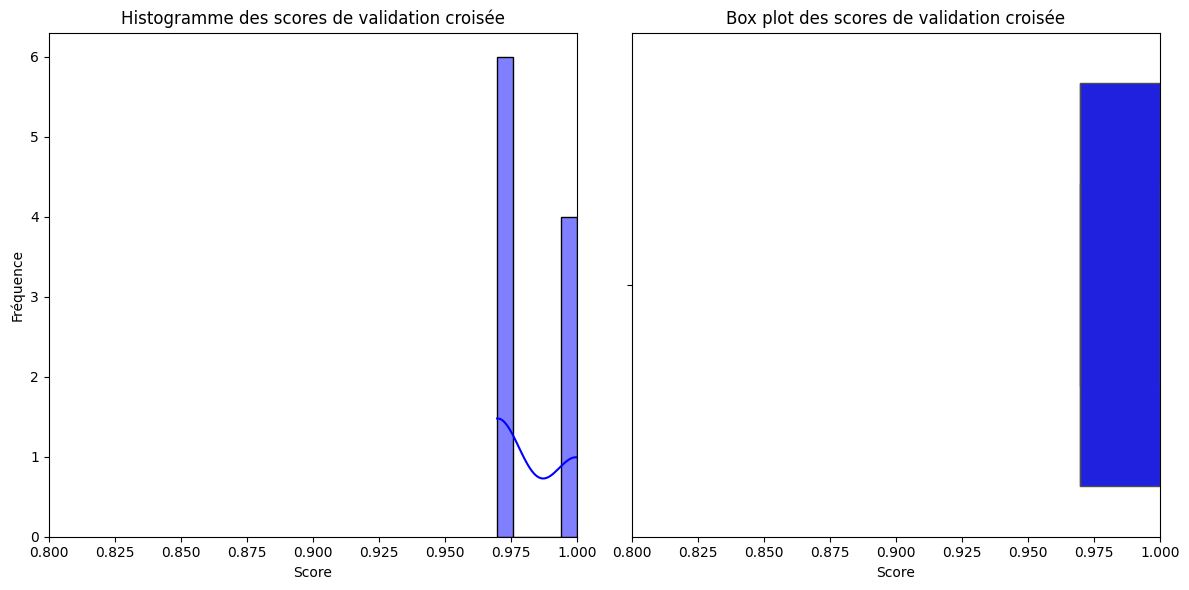

In [6]:
data_2 = pd.read_csv('data_class_2_2.csv')
X_2 = data_2.iloc[:, :2].to_numpy()
y_2 = data_2.iloc[:, 2].to_numpy()
# Initialiser le modèle
model = SVC(kernel='linear')

# Configurer K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=2)

# Exécuter la validation croisée et obtenir les scores et les modèles
results = cross_validate(model, X_2, y_2, cv=kf)

# Extraire les scores pour chaque pli
scores = results['test_score']
print("Justesse pour chaque pli :", scores)
print("Justesse moyenne : ", scores.mean())
print("Justesse écart-type : ", scores.std())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(scores, bins=5, kde=True, color='blue')
plt.title('Histogramme des scores de validation croisée')
plt.xlim((0.8, 1))
plt.xlabel('Score')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
sns.boxplot(x=scores, color='blue')
plt.xlim((0.8, 1))
plt.title('Box plot des scores de validation croisée')
plt.xlabel('Score')

plt.tight_layout()
plt.show()

In [7]:
print("Métriques du jeu de données N°1")
model_1 = SVC(kernel='linear')
model_1.fit(X_1, y_1)
y_1_pred = model_1.predict(X_1)
report_1 = classification_report(y_1, y_1_pred, target_names=[str(cl) for cl in model_1.classes_])
print(report_1)
print("Métriques du jeu de données N°2")
model_2 = SVC(kernel='linear')
model_2.fit(X_2, y_2)
y_2_pred = model_2.predict(X_2)
report_2 = classification_report(y_2, y_2_pred, target_names=[str(cl) for cl in model_2.classes_])
print(report_2)

Métriques du jeu de données N°1
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       300
           1       0.87      0.91      0.89       300

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

Métriques du jeu de données N°2
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       300
           1       1.00      0.80      0.89        30

    accuracy                           0.98       330
   macro avg       0.99      0.90      0.94       330
weighted avg       0.98      0.98      0.98       330



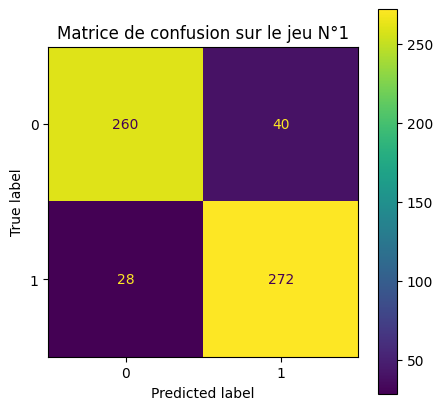

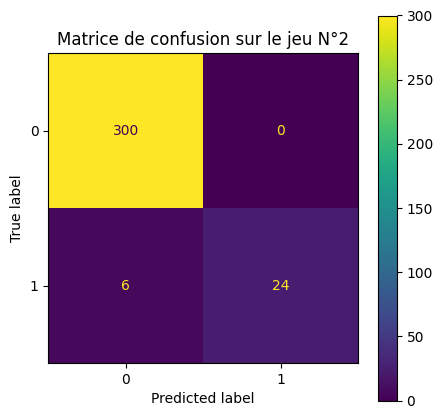

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Matrice de confusion pour les données d'entraînement
cm_train = confusion_matrix(y_1, y_1_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model_1.classes_)
disp_train.plot(ax=ax, values_format='d')
ax.set_title("Matrice de confusion sur le jeu N°1")
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Matrice de confusion pour les données d'entraînement
cm_train = confusion_matrix(y_2, y_2_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model_2.classes_)
disp_train.plot(ax=ax, values_format='d')
ax.set_title("Matrice de confusion sur le jeu N°2")
plt.show()

▶️ **Exécuter le code** de la fonction d'affichage du graphique de la validation croisée

In [9]:
def plot_kfold_distribution(X, y, kf):
    plt.figure(figsize=(10, 6))
    
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        y_train = np.full(len(train_index), fold)
        y_test = np.full(len(test_index), fold)
        
        plt.scatter(train_index, y_train, c='blue', label='Entraînement' if fold == 0 else "", marker='_', lw=10, s=1)
        plt.scatter(test_index, y_test, c='orange', label='Test' if fold == 0 else "", marker='_', lw=10, s=1)
    
    plt.xlabel('Index des échantillons')
    plt.ylabel('Pli')
    plt.title('Répartition des échantillons dans les différents plis')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## 💻 Code à compléter

**Objectif :**

Analyser la **répartition des données** dans les différents plis sur les données X,y.

**Etapes :**

- Tracer le graphique de la répartition des données pour la **validation croisée à 10 plis sans mélange aléatoire**
- Tracer le graphique de la répartition des données pour la **validation croisée à 10 plis avec mélange aléatoire**
- Tracer le graphique de la répartition des données pour la **validation croisée stratifiée à 10 plis**
- Comparer les résultats

**Ressources à utiliser :**

- [Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
- [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

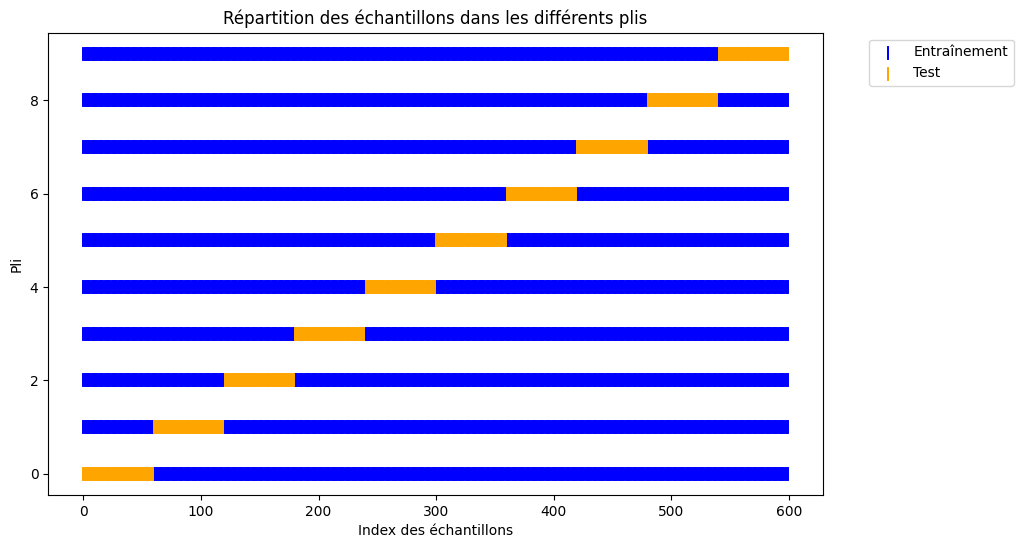

In [11]:
kf = KFold(n_splits=10, shuffle=False)
plot_kfold_distribution(X_1, y_1, kf)

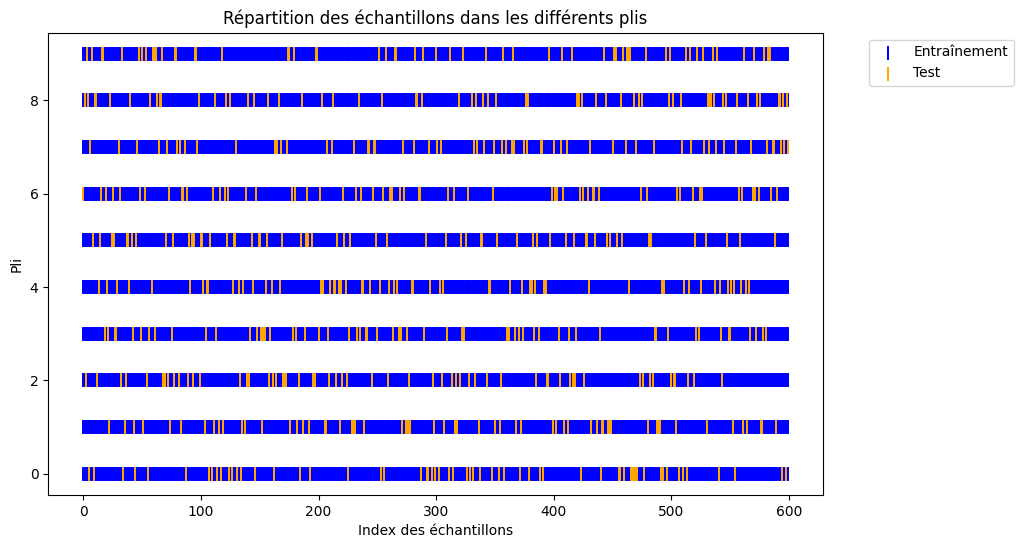

In [13]:
kf = KFold(n_splits=10, shuffle=True)
plot_kfold_distribution(X_1, y_1, kf)

▶️ **Exécuter le code** de la fonction d'affichage du graphique de la **validation croisée stratifiée**

In [14]:
def plot_stratified_kfold_distribution(X, y, cv, n_splits, lw=10):
    fig, ax = plt.subplots(figsize=(10, 6))
    cmap_cv = mcolors.ListedColormap(["blue", "orange"])
    cmap_data = mcolors.ListedColormap(['red', 'green'])
    for ii, (tr, tt) in enumerate(cv.split(X, y)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits + 1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Indice des échantillons",
        ylabel="Pli",
        ylim=[n_splits + 1.2, -0.2],
        xlim=[0, len(X)],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    plt.show()

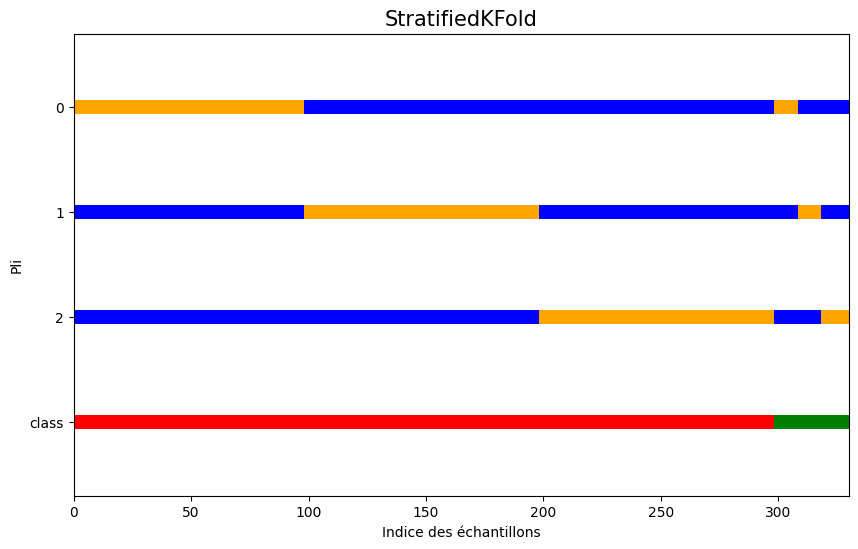

In [15]:
skf = StratifiedKFold(n_splits=3, shuffle=False)
plot_stratified_kfold_distribution(X_2, y_2, skf, 3)